In [17]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import tkinter
import plotly

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [18]:
    MLdb = mdl.MLdata('../data_sets/feats/')
    MLdb.load_datasets()
    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.set_dataset(0)
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)
    # MLdb.linear_regression()
    MLdb.use_model(modelfunc = AdaBoostRegressor)
    model = MLdb.model

In [ ]:
len(MLdb.test_x)

20001

In [ ]:
len(MLdb.test_y.iloc[:,0])

20001

In [ ]:
import psutil
psutil.Process().memory_info().rss / (1024*1024)

15135.671875

In [ ]:
y_pred = model.predict(MLdb.test_x)
horizon = 6*1
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_x.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [ ]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [ ]:
len(MLdb.naive_predictive())
# MLdb.test_x

20001

In [ ]:
y_pred_naive = MLdb.naive_predictive().to_numpy()

<Figure size 432x288 with 0 Axes>

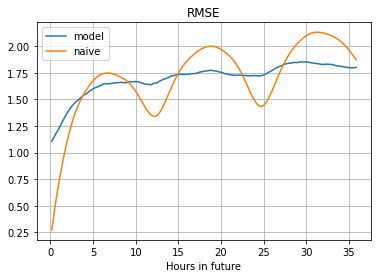

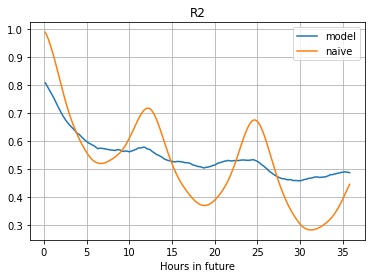

<Figure size 432x288 with 0 Axes>

In [ ]:
MSE_list = []
R2_list = []
MSE_list_naive = []
R2_list_naive = []


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_naive = y_pred_naive[:,i]
    MSE_list.append(mse(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    MSE_list_naive.append(mse(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,MSE_list,label = 'model')
plt.plot(x_bereik,MSE_list_naive,label = 'naive')
plt.title('RMSE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [ ]:
R2_list

array([0.80702647, 0.79872993, 0.78963309, 0.77999531, 0.77208079,
       0.76276532, 0.75333308, 0.74256225, 0.73230284, 0.72141984,
       0.71175021, 0.70165739, 0.69279541, 0.68440343, 0.67638886,
       0.66948122, 0.66282287, 0.65666064, 0.65176504, 0.64633142,
       0.64075525, 0.63540462, 0.62890562, 0.62489169, 0.621994  ,
       0.616928  , 0.61103045, 0.60638158, 0.60146907, 0.59751563,
       0.59366096, 0.59040823, 0.58857258, 0.58481794, 0.58302221,
       0.5796309 , 0.57510537, 0.57178796, 0.57348373, 0.57326465,
       0.5730785 , 0.57187727, 0.57160438, 0.56955752, 0.56943198,
       0.56790089, 0.56741041, 0.56644103, 0.5664393 , 0.56509747,
       0.56751446, 0.56818906, 0.56765686, 0.56642684, 0.56324581,
       0.56188878, 0.5634584 , 0.56339481, 0.56258117, 0.56067734,
       0.56226622, 0.56426687, 0.56565353, 0.56812578, 0.56937757,
       0.57373015, 0.57415965, 0.57475494, 0.57590847, 0.5768851 ,
       0.57702183, 0.57299819, 0.57053701, 0.56977872, 0.56717

In [ ]:
np.array(R2_list).clip(min=0)

array([0.80702647, 0.79872993, 0.78963309, 0.77999531, 0.77208079,
       0.76276532, 0.75333308, 0.74256225, 0.73230284, 0.72141984,
       0.71175021, 0.70165739, 0.69279541, 0.68440343, 0.67638886,
       0.66948122, 0.66282287, 0.65666064, 0.65176504, 0.64633142,
       0.64075525, 0.63540462, 0.62890562, 0.62489169, 0.621994  ,
       0.616928  , 0.61103045, 0.60638158, 0.60146907, 0.59751563,
       0.59366096, 0.59040823, 0.58857258, 0.58481794, 0.58302221,
       0.5796309 , 0.57510537, 0.57178796, 0.57348373, 0.57326465,
       0.5730785 , 0.57187727, 0.57160438, 0.56955752, 0.56943198,
       0.56790089, 0.56741041, 0.56644103, 0.5664393 , 0.56509747,
       0.56751446, 0.56818906, 0.56765686, 0.56642684, 0.56324581,
       0.56188878, 0.5634584 , 0.56339481, 0.56258117, 0.56067734,
       0.56226622, 0.56426687, 0.56565353, 0.56812578, 0.56937757,
       0.57373015, 0.57415965, 0.57475494, 0.57590847, 0.5768851 ,
       0.57702183, 0.57299819, 0.57053701, 0.56977872, 0.56717